# Modeling Process With Experimental Feature Database

In this notebook we use our experimental database to identify key features and tune the hyperparameters of several high preforming models. For model selection, we where looking for models where we could best improve the precision(reduce false positives) while not drastically reducing recall (false negatives).  To evaluate the models we used sklearn metrics and also viewed the confusion matrix to see how the models predictions on the test set preformed.

In [110]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
pd.set_option('display.max_columns', 300)
% matplotlib inline

plt.style.use('seaborn')

In [2]:
#Read in dataframe
exp_df = pd.read_csv('experiment_features.csv',index_col=0)
exp_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health,uterine_cont_per_min,total_change,sqrt_total_change,hist_zeros_1.0,hist_zeros_2.0,hist_zeros_3.0,hist_zeros_4.0,hist_zeros_5.0,hist_zeros_7.0,hist_zeros_8.0,hist_zeros_10.0,hist_tendancy_0.0,hist_tendancy_1.0,sev_decel_0.001,quant_acc_1,quant_light_dec_1,quant_hist_mean_1,quant_hist_mean_2,quant_hist_mean_3,quant_hist_mean_4,quant_hist_mean_5,quant_hist_mean_6
0,120.0,0.000,0.0,0.000,0.000,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,120.0,137.0,121.0,73.0,2.0,0.00,0.000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,132.0,0.006,0.0,0.006,0.003,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,141.0,136.0,140.0,12.0,1.0,0.36,1.980,0.122474,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,141.0,135.0,138.0,13.0,1.0,0.48,1.862,0.118322,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,137.0,134.0,137.0,13.0,1.0,0.48,1.876,0.118322,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,137.0,136.0,138.0,11.0,1.0,0.48,1.980,0.122474,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [3]:
# Evaluation function
def evaluation(y_test, y_pred):
    print('Accuracy: '  + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

In [4]:
#train test split of data
X = exp_df.drop('fetal_health', axis =1)
y = exp_df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)

In [5]:
#standared scaler for predicting features
scaler = StandardScaler()  
scaler.fit(X_train)

StandardScaler()

## Class imbalance

To handle class imbalance we oversampled the minority class using SMOTE(Synthetic Minority Oversampling Technique), this balanced the minority class by sampling the nearest neighboors and adding points between the neighbors.  We used both a SMOTE sampled database and unbalanced database to compare the effect of the metrics for each experimental baseline model.  The Smote Database preformed better on every baseline model, we chose to use the SMOTE database for our final models.  

In [6]:
#Used smote to oversample minority class
sm = SMOTE(random_state=25)
smX_train, smy_train = sm.fit_sample(X_train, y_train)

## KNN 

Here we ran a basline model of knn on the experimental database and compared the metrics results to the database treated with smote.  


In [7]:
#baseline KNN with class imbalance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = knn.predict(X_test)

In [9]:
#prediction metrics and confusion matrix of base KNN with class imbalance
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[396  13]
 [ 31  92]]
Accuracy: 0.9172932330827067
Recall: 0.9682151589242054
F1 Score: 0.9473684210526316
Precision: 0.927400468384075


In [10]:
#Base KNN model with Smote oversampled class
smknn = KNeighborsClassifier(n_neighbors=1)
smknn.fit(smX_train,smy_train)


KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = smknn.predict(X_test)

In [12]:
#Prediction metrics and confusion matrix of smote base KNN
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[392  17]
 [ 27  96]]
Accuracy: 0.9172932330827067
Recall: 0.9584352078239609
F1 Score: 0.9468599033816426
Precision: 0.9355608591885441


## Logistic Regression Basline Model

Here are two Logistic regression Models comparing the effect of SMOTE on the metric scores.  SMOTE greatly improved the precision of the model, however Recall was greatly reduced.  While one of the aims for our project was to improve precision as best we can, too many false negatives are not ideal for the overal fetal mortality rate.  

In [13]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

/Users/heymanjake/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[385  24]
 [ 41  82]]
Accuracy: 0.8778195488721805
Recall: 0.941320293398533
F1 Score: 0.9221556886227544
Precision: 0.903755868544601


In [15]:
smlr = LogisticRegression(solver='liblinear')
smlr.fit(smX_train,smy_train)
y_predsm = smlr.predict(X_test)

In [16]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_predsm)

[[385  24]
 [ 41  82]]
Accuracy: 0.8853383458646616
Recall: 0.8801955990220048
F1 Score: 0.9218950064020486
Precision: 0.967741935483871


Below is a table of feature coefficients for the Logistic Regression.  The greatest feature Coefficients are sqrt_total_change, quant_acc_1, quant_hist_mean(1 2 and 3) and tendancy_1.  All of these features are ones that we engineered.  Looking at what these features represent, for this model, the change in the rate of FHR and the average change in that rate seem to be the biggest factors for classifying fetal health.  We wanted to try and improve the Logistic regression by tuning the hyperparameters to improve both the recall and precision.  To attempt this we used a bagging classifer to train the logistic regression on multiple random samples and aggrigate the predictions to see how that effected the evaluation metrics.  

In [129]:
#Create a table of logistic regression coefficients and comparing the coefficients 
#of the SMOTE and inbalanced datasets
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table_2 = pd.DataFrame(list(smX_train.columns)).copy()
coef_table_2.insert(len(coef_table_2.columns),'sm_Coefs',smlr.coef_.transpose())

smote_vs_coef = pd.concat([coef_table,coef_table_2],axis=1)
smote_vs_coef.columns = ['features','Coefs','del','sm_Coefs']
del smote_vs_coef['del']
smote_vs_coef

,features,Coefs,sm_Coefs
0,baseline value,0.113120,0.112113
1,accelerations,-0.003969,-0.224252
2,fetal_movement,0.010522,0.313262
3,uterine_contractions,-0.005162,-0.055485
4,light_decelerations,-0.002154,-0.036389
5,prolongued_decelerations,0.000782,0.044586
6,abnormal_short_term_variability,0.066839,0.084350
7,mean_value_of_short_term_variability,-0.693801,-0.626913
8,percentage_of_time_with_abnormal_long_term_var...,0.037477,0.039607
9,mean_value_of_long_term_variability,0.028837,0.045947


In [114]:
#Bagging classifier for legistic regression
bag_log = BaggingClassifier(
    base_estimator=LogisticRegression(
        random_state=1),n_estimators=200,
    max_samples=.85,
    max_features=10,oob_score=True,
    n_jobs=-1,verbose=1)

In [115]:
bag_log.fit(smX_train, smy_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.3s finished


BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  max_features=10, max_samples=0.85, n_estimators=200,
                  n_jobs=-1, oob_score=True, verbose=1)

In [116]:
y_pred = bag_log.predict(X_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


In [117]:
evaluation(y_test,y_pred)

Accuracy: 0.8834586466165414
Recall: 0.8899755501222494
F1 Score: 0.9215189873417721
Precision: 0.9553805774278216


The Bagging classifer made only minute changes to the evaluation metrics.  We decided to look at some other models and compare the results.

## Decision Tree

The next model we tried was a decision tree.  Again we compared the imbalanced and SMOTE data sets on baseline models to observe the effect on the metrics.

In [18]:
tree = DecisionTreeClassifier()

tree = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[383  26]
 [ 18 105]]
Accuracy: 0.9172932330827067
Recall: 0.9364303178484108
F1 Score: 0.9456790123456791
Precision: 0.9551122194513716


In [20]:
smtree = DecisionTreeClassifier()
smtree.fit(smX_train,smy_train)
y_pred = smtree.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[396  13]
 [ 17 106]]
Accuracy: 0.943609022556391
Recall: 0.9682151589242054
F1 Score: 0.9635036496350364
Precision: 0.9588377723970944


In [22]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",tree.feature_importances_.transpose())

coef_table_2 = pd.DataFrame(list(smX_train.columns)).copy()
coef_table_2.insert(len(coef_table_2.columns),'sm_Coefs',tree.feature_importances_.transpose())

smote_vs_coef = pd.concat([coef_table,coef_table_2],axis=1)
smote_vs_coef.columns = ['features','importance','del','sm_importance']
del smote_vs_coef['del']
smote_vs_coef

,features,importance,sm_importance
0,baseline value,0.033734,0.033734
1,accelerations,0.020453,0.020453
2,fetal_movement,0.016659,0.016659
3,uterine_contractions,0.007839,0.007839
4,light_decelerations,0.004911,0.004911
5,prolongued_decelerations,0.028585,0.028585
6,abnormal_short_term_variability,0.340669,0.340669
7,mean_value_of_short_term_variability,0.107879,0.107879
8,percentage_of_time_with_abnormal_long_term_var...,0.048263,0.048263
9,mean_value_of_long_term_variability,0.012098,0.012098


In [23]:
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [24]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[402   7]
 [ 46  77]]
Accuracy: 0.900375939849624
Recall: 0.9828850855745721
F1 Score: 0.9381563593932323
Precision: 0.8973214285714286


In [25]:
smrfc = RandomForestClassifier()
smrfc.fit(smX_train,smy_train)
y_pred = smrfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test, y_pred)

[[400   9]
 [ 17 106]]
Accuracy: 0.9511278195488722
Recall: 0.9779951100244498
F1 Score: 0.9685230024213076
Precision: 0.9592326139088729


In [79]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rfc.feature_importances_.transpose())

coef_table_2 = pd.DataFrame(list(smX_train.columns)).copy()
coef_table_2.insert(len(coef_table_2.columns),'sm_Coefs',smrfc.feature_importances_.transpose())

smote_vs_coef = pd.concat([coef_table,coef_table_2],axis=1)
smote_vs_coef.columns = ['features','importance_baseline','del','sm_importance_baseline']
del smote_vs_coef['del']
smote_vs_coef

,features,importance_baseline,sm_importance_baseline
0,baseline value,9.926765e-03,2.031403e-02
1,accelerations,1.035325e-01,1.037052e-01
2,fetal_movement,4.708818e-03,1.489257e-02
3,uterine_contractions,1.058922e-02,2.515098e-02
4,light_decelerations,6.170803e-04,7.622728e-03
5,prolongued_decelerations,8.764041e-02,5.389957e-02
6,abnormal_short_term_variability,1.576849e-01,1.612922e-01
7,mean_value_of_short_term_variability,1.492258e-01,1.024083e-01
8,percentage_of_time_with_abnormal_long_term_var...,8.983866e-02,7.143558e-02
9,mean_value_of_long_term_variability,1.227784e-02,1.827732e-02


In [72]:
parameters = {
    'n_estimators': [25,50,100,300,500],
    'criterion' : ['gini','entropy'],
    'max_depth' : [8,9,10,11,12],
    'max_features' : ['sqrt'],
    'min_weight_fraction_leaf' : [0,0.1,0.3,0.5],
    
    
    
}

In [73]:
grid_tree=GridSearchCV(RandomForestClassifier(), parameters, cv=15, scoring='f1', verbose=1, n_jobs=-1)

In [74]:
grid_tree.fit(smX_train, smy_train)

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  5.5min finished


GridSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['sqrt'],
                         'min_weight_fraction_leaf': [0, 0.1, 0.3, 0.5],
                         'n_estimators': [25, 50, 100, 300, 500]},
             scoring='f1', verbose=1)

In [75]:

print(grid_tree.best_score_)

print(grid_tree.best_params_)


print(grid_tree.best_estimator_)



0.9762215043444111
{'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0, 'n_estimators': 500}
RandomForestClassifier(max_depth=11, max_features='sqrt',
                       min_weight_fraction_leaf=0, n_estimators=500)


In [76]:
y_pred = grid_tree.best_estimator_.predict(X_test)
evaluation(y_test,y_pred)

Accuracy: 0.9492481203007519
Recall: 0.9755501222493888
F1 Score: 0.9672727272727273
Precision: 0.9591346153846154


In [77]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",grid_tree.best_estimator_.feature_importances_.transpose())

In [85]:
coef_table.columns = ['features','grid_search_importance']
del coef_table['features']

In [87]:
best_features_rfc = pd.concat([smote_vs_coef,coef_table],axis=1)

In [88]:
best_features_rfc

,features,importance_baseline,sm_importance_baseline,grid_search_importance
0,baseline value,9.926765e-03,2.031403e-02,9.926765e-03
1,accelerations,1.035325e-01,1.037052e-01,1.035325e-01
2,fetal_movement,4.708818e-03,1.489257e-02,4.708818e-03
3,uterine_contractions,1.058922e-02,2.515098e-02,1.058922e-02
4,light_decelerations,6.170803e-04,7.622728e-03,6.170803e-04
5,prolongued_decelerations,8.764041e-02,5.389957e-02,8.764041e-02
6,abnormal_short_term_variability,1.576849e-01,1.612922e-01,1.576849e-01
7,mean_value_of_short_term_variability,1.492258e-01,1.024083e-01,1.492258e-01
8,percentage_of_time_with_abnormal_long_term_var...,8.983866e-02,7.143558e-02,8.983866e-02
9,mean_value_of_long_term_variability,1.227784e-02,1.827732e-02,1.227784e-02


In [95]:
best_features_rfc['coef_X_10'] = best_features_rfc.grid_search_importance*10

In [97]:
best_features_rfc

,features,importance_baseline,sm_importance_baseline,grid_search_importance,coef_X_10
0,baseline value,9.926765e-03,2.031403e-02,9.926765e-03,0.099268
1,accelerations,1.035325e-01,1.037052e-01,1.035325e-01,1.035325
2,fetal_movement,4.708818e-03,1.489257e-02,4.708818e-03,0.047088
3,uterine_contractions,1.058922e-02,2.515098e-02,1.058922e-02,0.105892
4,light_decelerations,6.170803e-04,7.622728e-03,6.170803e-04,0.006171
5,prolongued_decelerations,8.764041e-02,5.389957e-02,8.764041e-02,0.876404
6,abnormal_short_term_variability,1.576849e-01,1.612922e-01,1.576849e-01,1.576849
7,mean_value_of_short_term_variability,1.492258e-01,1.024083e-01,1.492258e-01,1.492258
8,percentage_of_time_with_abnormal_long_term_var...,8.983866e-02,7.143558e-02,8.983866e-02,0.898387
9,mean_value_of_long_term_variability,1.227784e-02,1.827732e-02,1.227784e-02,0.122778


In [99]:
xgb.XGBClassifier()

XGBClassifier()

In [103]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.75, 
                           subsample = 0.85,
                           learning_rate = 0.1,
                           max_depth = 11, 
                           alpha = 1, 
                           n_estimators = 1000,
                          verbose=1, n_jobs=-1)

In [104]:
xg_clf.fit(smX_train,smy_train)

XGBClassifier(alpha=1, colsample_bytree=0.75, max_depth=11, n_estimators=1000,
              n_jobs=-1, subsample=0.85, verbose=1)

In [106]:
y_pred = xg_clf.predict(X_test)

In [107]:
evaluation(y_test,y_pred)

Accuracy: 0.9642857142857143
Recall: 0.9902200488997555
F1 Score: 0.97708082026538
Precision: 0.9642857142857143


In [108]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",xg_clf.feature_importances_.transpose())

In [109]:
coef_table

,0,Coefs
0,baseline value,0.015132
1,accelerations,0.169203
2,fetal_movement,0.016855
3,uterine_contractions,0.020800
4,light_decelerations,0.015470
5,prolongued_decelerations,0.099882
6,abnormal_short_term_variability,0.149758
7,mean_value_of_short_term_variability,0.024495
8,percentage_of_time_with_abnormal_long_term_var...,0.022075
9,mean_value_of_long_term_variability,0.008179


In [118]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [500,1000,1500],
              'learning_rate': [0.1,0.07,0.05,0.03,0.01],
              'max_depth': [9,10,11,12,13],
              'colsample_bytree': [0.5,0.45,0.4],
              'min_child_weight': [1, 2, 3]
             }

In [119]:
grid_xg = GridSearchCV(estimator=clf_xgb,
                      param_grid= param_dist,
                      scoring='f1',
                      n_jobs=-1,
                      verbose=1,
                      iid=False,
                      cv=10)

In [120]:
grid_xg.fit(smX_train,smy_train)

Fitting 10 folds for each of 675 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 54.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 69.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 86.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 103.0min
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed: 117.0min finished
/Users/heymanjake/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is depreca

GridSearchCV(cv=10, estimator=XGBClassifier(), iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.45, 0.4],
                         'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
                         'max_depth': [9, 10, 11, 12, 13],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [500, 1000, 1500]},
             scoring='f1', verbose=1)

In [121]:
grid_xg.best_params_

{'colsample_bytree': 0.45,
 'learning_rate': 0.07,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 500}

In [123]:
y_pred = grid_xg.best_estimator_.predict(X_test)

In [128]:
print(confusion_matrix(y_test, y_pred))
evaluation(y_test,y_pred)

[[405   4]
 [ 14 109]]
Accuracy: 0.9661654135338346
Recall: 0.9902200488997555
F1 Score: 0.9782608695652174
Precision: 0.9665871121718377


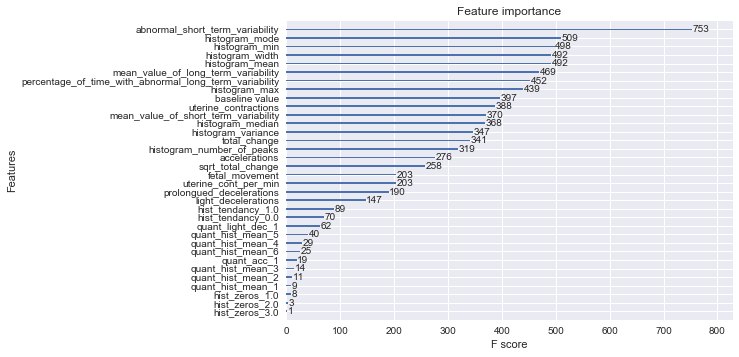

In [127]:
from xgboost import plot_importance
plot_importance(grid_xg.best_estimator_)